In [1]:
import plotly.graph_objects as go
import numpy as np
import sys
import os
sys.path.append(
    os.path.join(os.getcwd(), os.path.pardir))
from furiosanet import test, get_layers_from_file
from sklearn.metrics import r2_score

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1090)              30520     
_________________________________________________________________
dense_1 (Dense)              (None, 3740)              4080340   
_________________________________________________________________
dense_2 (Dense)              (None, 1460)              5461860   
_________________________________________________________________
dense_3 (Dense)              (None, 1020)              1490220   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1021      
Total params: 11,063,961
Trainable params: 11,063,961
Non-trainable params: 0
_________________________________________________________________
None
35950184.0 47756590.0


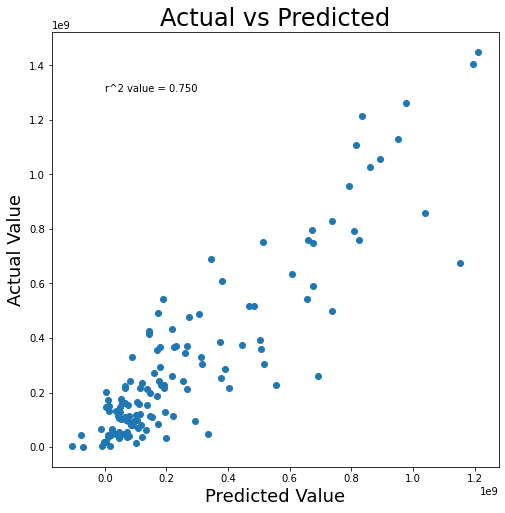

In [2]:
import pandas as pd
models = pd.read_csv("../model-evaluation.csv", index_col=0).index.tolist()
weights_file = "../weights/automated/" + models[0]
layers = get_layers_from_file(weights_file)
preds, actual, dataset, test_indices = test(weights_file, layers, data_file="../dbs/data_2010s.csv", show_fig=False)
print(preds[0], actual[0])

In [3]:
data = pd.read_csv("../dbs/data_2010s.csv")
test_data = data.iloc[test_indices, :]
test_data["predicted"] = preds.T


In [4]:
def make_predicted(series_object, t):
    return t

In [5]:
idx = 0
def create_idx(series_object):
    global idx
    idx += 1
    return idx


In [6]:
# test_data = test_data.sort_values("revenue")
test_data["index"] = test_data.apply(create_idx, axis=1)
data2 = test_data.copy()
data3 = test_data.copy()
data2["type"] = data2.apply(lambda x: make_predicted(x, "Predicted"), axis=1)
data3["type"] = data3.apply(lambda x: make_predicted(x, "Revenue"), axis=1)
graph_data = data2.append(data3)
len(graph_data)

260

In [7]:
def get_graph_value(series_object):
    if series_object["type"] == "Revenue":
        return series_object["revenue"]
    else:
        return series_object["predicted"]

In [9]:
graph_data["graph_value"] = graph_data.apply(get_graph_value, axis=1)

In [10]:
import plotly.express as px
fig2 = px.scatter(graph_data,
                    x="index",
                    y="graph_value",
                    color="type",
                    hover_name="title", 
                    title="Actual Revenue and Predicted Revenue",
                    width=1000,
                    height=700)
# fig2.update_traces(mode="markers", hovertemplate=None)
fig2.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')), 
                                        hovertemplate=None)
fig2.update_layout(hovermode="x")
fig2.show()

In [12]:
import plotly.express as px
from utils.misc import stringify_model
model = stringify_model(layers)
fig = px.scatter(graph_data,
                    x="predicted",
                    y="revenue",
                    hover_name="title",
                    hover_data=["predicted", "revenue"],
                    title=f"Actual Revenue and Predicted Revenue for {model}",
                    width=1000,
                    height=700)
fig.update_traces(marker=dict(size=12,
                              color='pink',
                              line=dict(width=1,
                                        color='black'))) 
                #   hovertemplate=None)
fig.update_layout(hovermode="x",
                  hoverlabel=dict(
                        bgcolor="skyblue",
                        font_size=16,
                        font_family="Rockwell"
                    ))
fig.show()

In [14]:
from utils.misc import save_plot
save_plot(fig, model)

In [28]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = graph_data["predicted"].values
y = graph_data["revenue"].values
# y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

In [29]:

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


In [32]:
# create our callback function
def update_point(trace, points, selector):
    print(trace)
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s

In [35]:
scatter.on_click(update_point)
f.trace

AttributeError: 'FigureWidget' object has no attribute 'trace'

In [4]:
import pandas as pd
movies = pd.read_csv("../dbs/data_2010s.csv")
movies[['title', 'year']].groupby('year').first().head(10)

,title
year,
2010,The Book of Eli
2011,Beastly
2012,The Avengers
2013,Warm Bodies
2014,Divergent
2015,Mission: Impossible - Rogue Nation
2016,Warcraft
2017,Pirates of the Caribbean: Dead Men Tell No Tales
2018,Captain Marvel
